# Logistic Regression

## Notation

- $x$ - Input features.
- $x_j$ - The $j^{th}$ feature.
- $\vec{x^{(i)}}$ - Features of the $i^{th}$ training example; the $i^{th}$ row.
- $x_j^{(i)}$ - The $i^{th}$ element for the $j^{th}$ feature.
- $y$ - Output/target variable.
- $y^{(i)}$ - The $i^{th}$ output value.
- $m$ - Number of training examples.
- $n$ - Number of training features.
- $\vec{w}, b$ - Model parameters.
- $\alpha$ - Learning rate.

## Formulas

### Sigmoid Function / Model Prediction

$g(z) = \frac{1}{1 + e^{-z}}$, where\
$z = f_{\vec{w}, b}(\vec{x}) = \vec{w} \cdot \vec{x} + b$

### Loss Function

$L(f_{\vec{w}, b}(\vec{x^{(i)}}), y^{(i)}) = $\
$-\log (f*{\vec{w}, b}(\vec{x^{(i)}}))$ if $y^{(i)} = 1$\
$-\log (1 - f*{\vec{w}, b}(\vec{x^{(i)}}))$ if $y^{(i)} = 0$\

Which simplifies to:

$L(f_{\vec{w}, b}(\vec{x^{(i)}}), y^{(i)}) = - y^{(i)} \log (f_{\vec{w}, b}(\vec{x^{(i)}})) - (1 - y^{(i)}) \log (1 - f_{\vec{w}, b}(\vec{x^{(i)}}))$

Basically, if your target value, $y^{(i)} = 1$, we're gonna punish you by making $L -> infinity$ as you go to 0, and vice-versa.

### Cost Function

$J(\vec{w}, b) = \frac{1}{2m} \sum_{i = 1}^{m} L(f_{\vec{w}, b}(\vec{x^{(i)}}) - y^{(i)})$

### Gradient Descent

Repeat the until convergence:

$w_j = w_j - \alpha \frac{\partial}{\partial w_j} J(\vec{w}, b)$\
$b = b - \alpha \frac{\partial}{\partial b} J(\vec{w}, b)$

Repeat the until convergence:

$w_j =  w_j - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)}]$\
$b = b - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})]$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Logistic Regression Implementation


In [2]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000, threshold=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            y_predict = self._sigmoid(np.dot(X, self.weights) + self.bias)

            dw = (1 / n_samples) * np.dot(X.T, y_predict - y)
            db = (1 / n_samples) * sum(y_predict - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predict = self._sigmoid(np.dot(X, self.weights) + self.bias)
        return [1 if i > self.threshold else 0 for i in y_predict]

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

## Generate and Visualize Random Dataset


In [22]:
iris_dataset = load_iris()
X = iris_dataset["data"]
y = iris_dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

print(f"X_train shape: {X_train.shape}, y-train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y-test shape: {y_test.shape}")

X_train shape: (120, 4), y-train shape: (120,)
X_test shape: (30, 4), y-test shape: (30,)


ValueError: x and y must be the same size

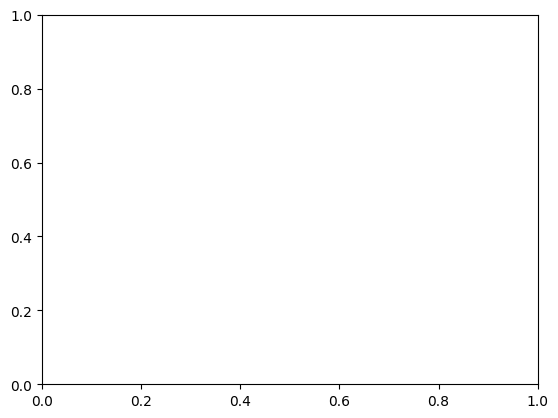

In [24]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
plt.show()